In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

from sklearn import cluster, datasets

from sklearn.cluster import AgglomerativeClustering

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

# Método do Cotovelo para Determinação do Número de Clusters (K-Means)

Plotar a curva do método do cotovelo pode ser uma abordagem útil para determinar o número ideal de clusters em seu conjunto de dados. O método do cotovelo é uma técnica comum usada para identificar o número ótimo de clusters observando a relação entre o número de clusters e a variabilidade dentro de cada cluster.

A ideia básica é calcular o valor da métrica de clusterização (por exemplo, a soma dos quadrados intra-cluster, WCSS) para diferentes valores de k (número de clusters) e plotá-los em um gráfico. Você então observa o ponto onde a curva começa a se "dobrar" ou "achatar" (daí o nome "cotovelo"), o que sugere que adicionar mais clusters não melhora muito a variabilidade dentro dos clusters.

In [114]:
# Carregar dados do Excel
dados = pd.read_excel('neurito_ctl_ata.xlsx', sheet_name = "Sheet2")

# Selecionar as colunas relevantes - tabela com os valores de neurito CTL
X = dados[['quant_primario', 'mean_primario', 
           'quant_secundario', 'mean_secundario', 
           'quant_terciario', 'mean_terciario']]

Número ideal de clusters: 4


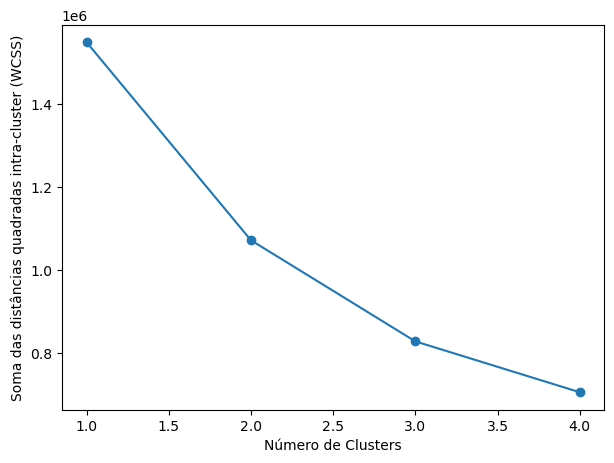

In [115]:
# Calcular a WCSS para diferentes números de clusters
wcss = []
for i in range(1, 5):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Calcular a diferença entre os valores de WCSS consecutivos
differences = np.diff(wcss)

# Encontrar o índice onde a diferença é máxima
max_diff_index = np.argmax(differences)

# O número ideal de clusters é o índice + 1
optimal_clusters = max_diff_index + 2  # Adicionamos 2 porque o índice começa em 0 e queremos o número real de clusters

print("Número ideal de clusters:", optimal_clusters)

plt.figure(figsize=(7, 5))
plt.plot(range(1, 5), wcss, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma das distâncias quadradas intra-cluster (WCSS)')

# Salvar a figura
#plt.savefig('Número de Clusters.png') 

plt.show()

# Quantidade de Clusters definido - 4

In [19]:
# Carregar dados do Excel
dados = pd.read_excel('neurito_ctl_ata.xlsx', sheet_name = "Sheet1", index_col=0)

# Selecionar as colunas relevantes
X = dados[['quant_primario', 'mean_primario', 
           'quant_secundario', 'mean_secundario', 
           'quant_terciario', 'mean_terciario']]

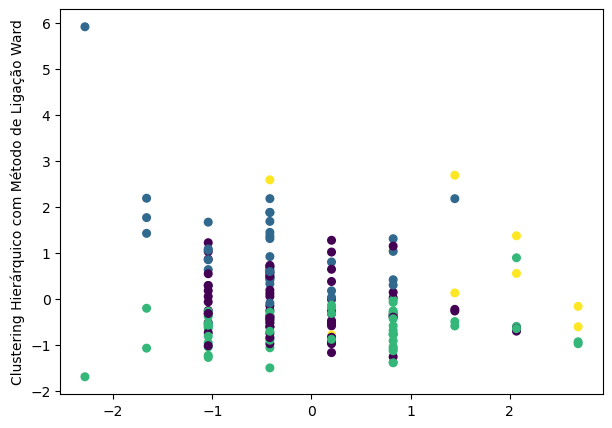

In [21]:
# Normalizar os dados
X = StandardScaler().fit_transform(X)

# Criar o objeto de clustering hierárquico com método de ligação "Ward"
ward = cluster.AgglomerativeClustering(n_clusters=4, linkage='ward')

# Executar o clustering
y_pred = ward.fit_predict(X)

# Plotar os resultados do clustering
plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=30)
plt.ylabel('Clustering Hierárquico com Método de Ligação Ward')
plt.show()

# Tentativa 2

Redução de dimensionalidade usando PCA para visualização - apliquei o PCA para reduzir a dimensionalidade dos dados para 2 componentes principais e, em seguida, apliquei o algoritmo de clustering hierárquico.

A análise de componentes principais (PCA) é uma técnica de redução de dimensionalidade que busca representar os dados em um espaço de menor dimensão, mantendo a maior parte da variabilidade original dos dados. Ao reduzir a dimensionalidade, o PCA projeta os dados em um novo conjunto de eixos, chamados de componentes principais, onde o primeiro componente principal captura a maior parte da variabilidade dos dados, o segundo componente principal captura a segunda maior parte da variabilidade e assim por diante.

Portanto, quando você realiza uma PCA com n_components=2, está solicitando que o algoritmo identifique os dois principais componentes que capturam a maior parte da variabilidade dos seus dados originais. Esses dois componentes principais são usados para representar os dados em um espaço bidimensional, o que facilita a visualização e interpretação dos padrões nos dados.

No contexto do seu problema, ao usar PCA com n_components=2, os "dois componentes principais" se referem aos dois eixos principais do novo espaço dimensional, nos quais os dados são projetados após a redução de dimensionalidade. Esses componentes podem ser interpretados como combinações lineares das características originais que melhor representam a variabilidade dos seus dados.

Ao interpretar o gráfico resultante, procure o ponto onde a curva começa a se achatar. Este ponto é frequentemente considerado como o número ideal de clusters para o seu conjunto de dados. No entanto, a interpretação do método do cotovelo pode ser subjetiva e depende do contexto do seu problema e da sua análise específica.

#from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA

In [103]:
# Carregar dados do Excel - CTL
dados1 = pd.read_excel('neurito_ctl_ata.xlsx', sheet_name="Sheet1", index_col=0)

In [104]:
# Selecionar as colunas relevantes
X = dados1[['quant_primario', 'mean_primario', 
           'quant_secundario', 'mean_secundario', 
           'quant_terciario', 'mean_terciario']]

In [105]:
# Normalizar os dados
X = StandardScaler().fit_transform(X)

# Redução de dimensionalidade com PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Criar o objeto de clustering hierárquico com método de ligação "Ward"
ward = AgglomerativeClustering(n_clusters=4, linkage='ward')

# Executar o clustering
y_pred = ward.fit_predict(X_pca)

In [106]:
# Adicionar os clusters como uma coluna na tabela original
dados1['Cluster'] = y_pred

# Salvar a tabela original com a coluna de clusters em um arquivo Excel
dados1.to_excel('resultados_clusters_CTL.xlsx')

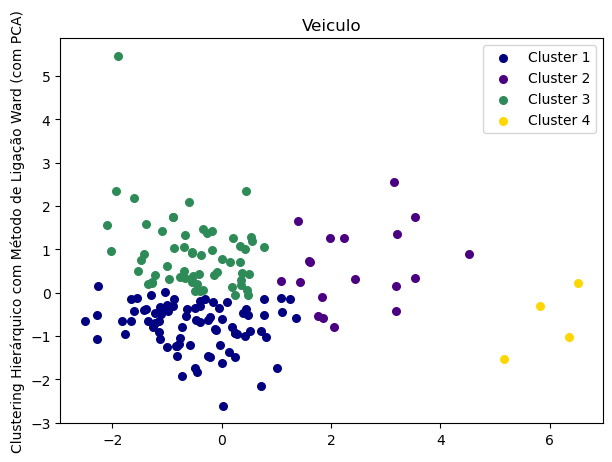

In [107]:
# Definir um mapa de cores personalizado para os clusters
coress = ['navy', 'indigo', 'seagreen', 'gold']

# Plotar os resultados do clustering
plt.figure(figsize=(7, 5))
for i in range(4):
    plt.scatter(X_pca[y_pred == i, 0], X_pca[y_pred == i, 1], c=coress[i], label=f'Cluster {i+1}', s=30)
plt.title('Veiculo')
plt.ylabel('Clustering Hierárquico com Método de Ligação Ward (com PCA)')
plt.legend()

# Salvar a figura
plt.savefig('Clustering Hierárquico veiculo.png') 

plt.show()

Tratamento

In [109]:
# Carregar dados do Excel
dados3 = pd.read_excel('neurito_ctl_ata.xlsx', sheet_name="Sheet3", index_col=0)

# Selecionar as colunas relevantes
X = dados3[['quant_primario', 'mean_primario', 
           'quant_secundario', 'mean_secundario', 
           'quant_terciario', 'mean_terciario']]


In [110]:
# Normalizar os dados
X = StandardScaler().fit_transform(X)

# Redução de dimensionalidade com PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Criar o objeto de clustering hierárquico com método de ligação "Ward"
ward = AgglomerativeClustering(n_clusters=4, linkage='ward')

# Executar o clustering
y_pred = ward.fit_predict(X_pca)

In [111]:
# Adicionar os clusters como uma coluna na tabela original
dados3['Cluster'] = y_pred

# Salvar a tabela original com a coluna de clusters em um arquivo Excel
dados3.to_excel('resultados_clusters_ATA.xlsx')

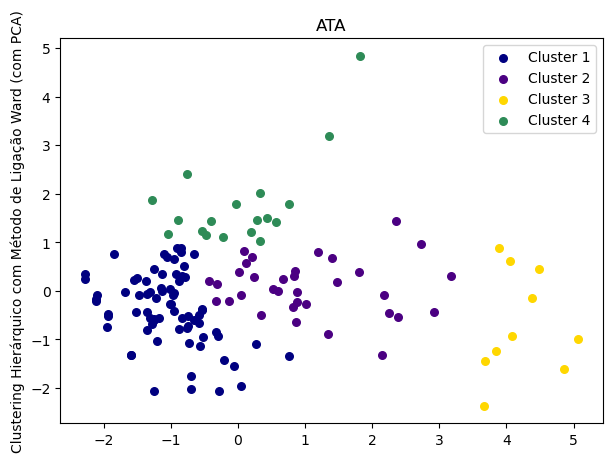

In [112]:
# Definir um mapa de cores personalizado para os clusters
cores = ['navy', 'indigo', 'gold', 'seagreen']

# Plotar os resultados do clustering
plt.figure(figsize=(7, 5))
for i in range(4):
    plt.scatter(X_pca[y_pred == i, 0], X_pca[y_pred == i, 1], c=cores[i], label=f'Cluster {i+1}', s=30)
plt.title('ATA')
plt.ylabel('Clustering Hierárquico com Método de Ligação Ward (com PCA)')
plt.legend()

# Salvar a figura
#plt.savefig('Clustering Hierárquico ATA.png') 

plt.show()

# Comparaçao entre controle e tratamento (veiculo e ATA)

In [87]:
# Carregar dados do Excel
dados = pd.read_excel('neurito_ctl_ata.xlsx', sheet_name="Sheet2", index_col=0)

In [88]:
# Separar os dados de controle e tratamento
dados_controle = dados[dados['grupo'] == 'controle']
dados_tratamento = dados[dados['grupo'] == 'tratamento']

# Selecionar as colunas relevantes para controle
X_controle = dados_controle[['quant_primario', 'mean_primario', 
                             'quant_secundario', 'mean_secundario', 
                             'quant_terciario', 'mean_terciario']]

# Selecionar as colunas relevantes para tratamento
X_tratamento = dados_tratamento[['quant_primario', 'mean_primario', 
                                 'quant_secundario', 'mean_secundario', 
                                 'quant_terciario', 'mean_terciario']]

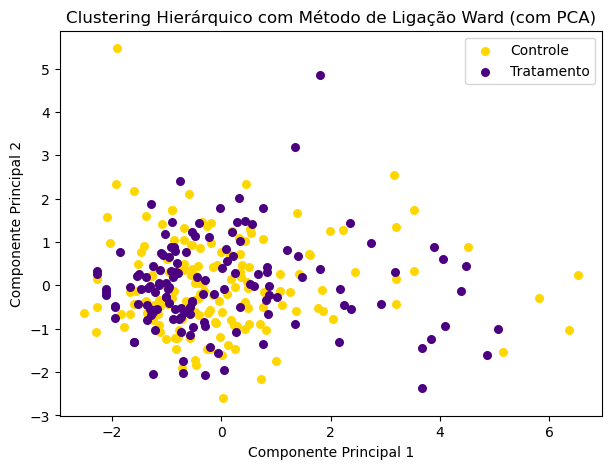

In [113]:
# Normalizar os dados para controle
X_controle = StandardScaler().fit_transform(X_controle)

# Normalizar os dados para tratamento
X_tratamento = StandardScaler().fit_transform(X_tratamento)

# Redução de dimensionalidade com PCA para controle
pca_controle = PCA(n_components=2)
X_pca_controle = pca_controle.fit_transform(X_controle)

# Redução de dimensionalidade com PCA para tratamento
pca_tratamento = PCA(n_components=2)
X_pca_tratamento = pca_tratamento.fit_transform(X_tratamento)

# Unir os dados reduzidos de controle e tratamento
X_pca = np.concatenate((X_pca_controle, X_pca_tratamento))

# Criar o objeto de clustering hierárquico com método de ligação "Ward"
ward = AgglomerativeClustering(n_clusters=2, linkage='ward')

# Executar o clustering
y_pred = ward.fit_predict(X_pca)


# Plotar os resultados do clustering para controle e tratamento
plt.figure(figsize=(7, 5))

# Plotar os pontos de controle em azul
plt.scatter(X_pca_controle[:, 0], X_pca_controle[:, 1], color='gold', label='Controle', s=30)

# Plotar os pontos de tratamento em laranja
plt.scatter(X_pca_tratamento[:, 0], X_pca_tratamento[:, 1], color='indigo', label='Tratamento', s=30)

plt.title('Clustering Hierárquico com Método de Ligação Ward (com PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()

# Salvar a figura
#plt.savefig('Clustering Hierárquico veiculo vs ata.png')

plt.show()
 